In [101]:
import pandas as pd
import numpy as np
import math
from scipy.stats import norm
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [6]:
# path = "/Users/tmullane/Library/CloudStorage/OneDrive-Stanford/Class/Metrics/pset"
file1_path = "src/lalonde_experimental.txt"
data =  pd.DataFrame(np.loadtxt(file1_path))
data.columns = ["treat", "wage"]
data

,treat,wage
0,0.0,0.0000
1,0.0,12.3837
2,0.0,0.0000
3,0.0,10.7401
4,0.0,11.7965
...,...,...
440,1.0,15.9526
441,1.0,36.6469
442,1.0,12.8040
443,1.0,3.7866


1. a. est null hypothesis that there is no effect of the training program on earnings using a t-stat

In [21]:
# H0: Y_i(C) = Y_i(T) for all i

T_w1 = data[data.treat == 1].aggregate({"wage": "sum", "treat": "count"})
T_w0 = data[data.treat == 0].aggregate({"wage": "sum", "treat": "count"})
T = (T_w1["wage"]/T_w1["treat"] - T_w0["wage"]/T_w0["treat"])
T


np.float64(1.794341237006238)

In [159]:
N = float(len(data))
M = float(len(data[data.treat == 1]))

In [160]:
data[data.wage == 0].treat.mean()
# treated["wage"].mean()

np.float64(0.3284671532846715)

In [161]:
s_0_sq = 1/(N-M-1) * sum((data[data.treat == 0].wage - data[data.treat == 0].treat.mean())**2)
s_1_sq = 1/(M - 1) * sum((data[data.treat == 1].wage - data[data.treat == 1].treat.mean())**2)

In [162]:
print(s_0_sq, s_1_sq)

50.89875055710426 90.6648192214131


In [22]:
# s_0_sq = 1/(T_w0["treat"] - T_w1["treat"] - 1) * sum((data[data.treat == 0].wage - T_w0["wage"]/T_w0["treat"])**2)
# s_1_sq = 1/(T_w1["treat"] - 1) * sum((data[data.treat == 1].wage - T_w1["wage"]/T_w1["treat"])**2)

In [163]:
ttest = float(T/(math.sqrt(s_0_sq/(N-M) + s_1_sq/M)))
print("t-test = " ,ttest)

t-test =  2.1666671496236822


In [164]:
p = 2 * norm.sf(abs(T))
print("p-value = " ,float(p))

p-value =  0.07275871997731019


1.b.

In [165]:
# randomly assign binary treatment to each individual and calculate the average treatment effect 100 times
# 1. Generate random treatment assignment
np.random.seed(123)
random_assignment = np.random.randint(2, size=len(data))
random_treat = np.random.choice([0, 1], size=(1000000,int(N)), p=[M/N, 1-M/N])
len(random_treat)

1000000

In [166]:
data[random_treat[0]==1]

,treat,wage,random_treat,rank
1,0.0,12.3837,1,393.0
2,0.0,0.0000,0,69.0
3,0.0,10.7401,0,371.0
5,0.0,9.2271,0,346.0
6,0.0,10.5693,0,369.0
...,...,...,...,...
439,1.0,5.1120,0,268.0
440,1.0,15.9526,0,416.0
442,1.0,12.8040,0,401.0
443,1.0,3.7866,0,227.0


In [79]:
# 2. Calculate the average treatment effect
# def calculate_ate(i):
#     treated = data[random_treat[i] == 1]
#     control = data[random_treat[i] == 0]
#     ate = treated["wage"].mean() - control["wage"].mean()
#     return ate
# # # 3. Calculate the average treatment effect for the entire dataset
# # ate = calculate_ate(i=0:1000000)
# print(f"Average Treatment Effect: {ate}")

Average Treatment Effect: 0.2947042666666668


In [167]:
wages = data["wage"].to_numpy()
wages_expand = wages[None, :]
treated = random_treat == 1
control = random_treat == 0

In [168]:
treated_means = np.sum(treated * wages_expand, axis=1) / np.sum(treated, axis=1)
control_means = np.sum(control * wages_expand, axis=1) / np.sum(control, axis=1)

ates = treated_means - control_means

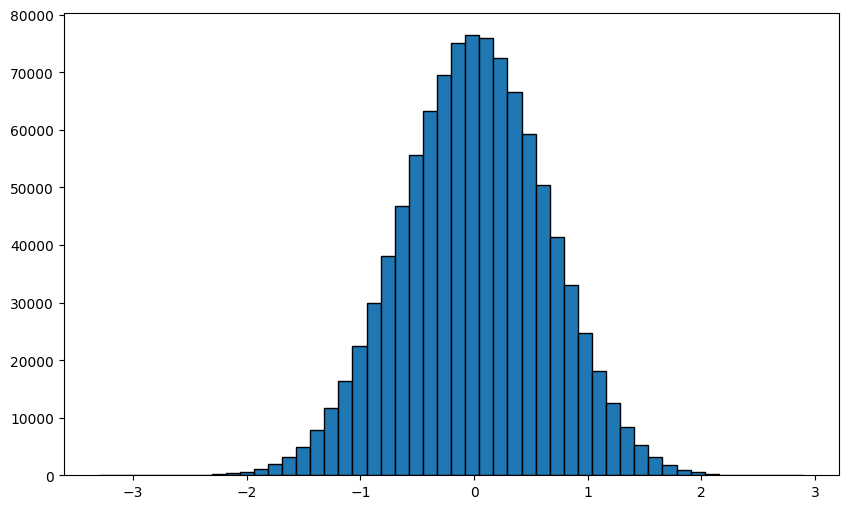

In [169]:
plt.figure(figsize=(10, 6))
plt.hist(ates, bins=50, edgecolor='black')
plt.show()

In [170]:
# get the rate of ates are less than T_obs
print("p-value = ", len(ates[abs(ates) < T])/len(ates))

p-value =  0.995669


In [171]:
data["rank"] = data["wage"].rank()

In [172]:
rank = data["rank"].to_numpy()
rank_expand = rank[None, :]

In [173]:
treated_means_rank = np.sum(treated * rank_expand, axis=1) / np.sum(treated, axis=1)
control_means_rank = np.sum(control * rank_expand, axis=1) / np.sum(control, axis=1)

ates_rank = treated_means_rank - control_means_rank

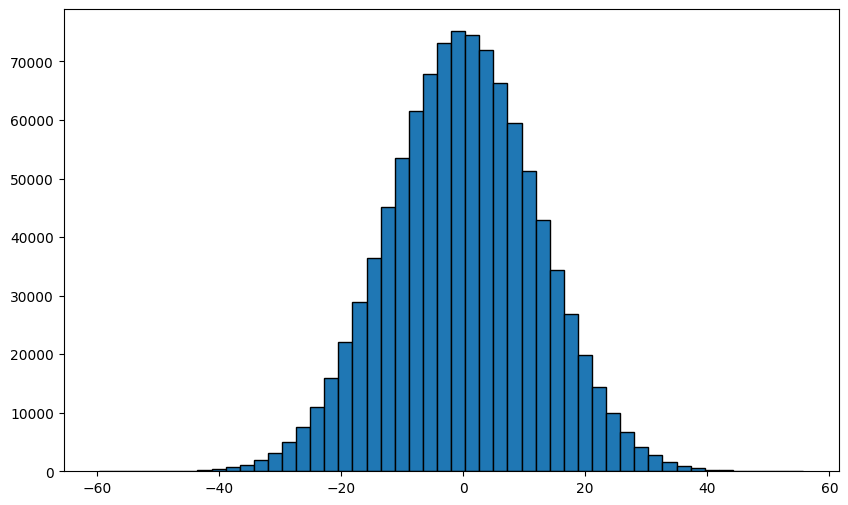

In [174]:
plt.figure(figsize=(10, 6))
plt.hist(ates_rank, bins=50, edgecolor='black')
plt.show()

In [175]:
# count what the rate of ates are less than T_obs
print("p-value = ", len(ates_rank[abs(ates_rank) < T])/len(ates_rank))

p-value =  0.116493


1.d.

In [176]:
data

,treat,wage,random_treat,rank
0,0.0,0.0000,0,69.0
1,0.0,12.3837,1,393.0
2,0.0,0.0000,0,69.0
3,0.0,10.7401,0,371.0
4,0.0,11.7965,0,389.0
...,...,...,...,...
440,1.0,15.9526,0,416.0
441,1.0,36.6469,1,443.0
442,1.0,12.8040,0,401.0
443,1.0,3.7866,0,227.0


In [177]:
np.sum(data.wage[data.treat==1])/M - np.sum(data.wage[data.treat==0])/(N-M)

np.float64(1.794341237006238)

In [178]:
s_2c = (1/(N-M-1))*np.sum((data.wage[data.treat==0]-np.mean(data.wage[data.treat==0]))**2)
s_2t = (1/(M-1))*np.sum((data.wage[data.treat==1]-np.mean(data.wage[data.treat==1]))**2)

In [189]:
var_hat = s_2t/M - s_2c/(N-M)
var_hat

np.float64(0.21890970959320882)

In [190]:
# 95% confidence intervals
ci_lower = ate - 1.96 * np.sqrt(var_hat)
ci_upper = ate + 1.96 * np.sqrt(var_hat)
print(ci_lower, ci_upper)

-0.6223363760385903 1.211744909371924


In [197]:
mean_1 = np.mean(data.wage[data.treat==1])
mean_0 = np.mean(data.wage[data.treat==0])

def error_term(row):
    if row['treat'] == 1:
        return row.wage - mean_1
    else:
        return row.wage - mean_0

# apply the error term function to each row of the data
data['error'] = data.apply(error_term, axis=1)

The homoskedastic varriance estimate is larger than the Neyman variance estimator.

In [207]:
mean_treat = np.mean(data.treat)
var_homo = np.sum((data.error)**2/N)/np.sum((data.treat-mean_treat)**2)
var_homo

np.float64(0.3987032422735858)

2.

In [217]:
sig = 0.05
std_dev = 6.63
effect = 1.79
power = 0.8

In [226]:
norm.ppf(1-0.8)

np.float64(-0.8416212335729143)

In [227]:
n = (((norm.ppf(1-sig/2) + abs(norm.ppf(1-0.8)))*std_dev)/effect)**2
n

np.float64(107.67841877432336)

b.

In [228]:
effect = 0.11
std_dev = 0.46

In [229]:
n = (((norm.ppf(1-sig/2) + abs(norm.ppf(1-0.8)))*std_dev)/effect)**2
n

np.float64(137.258095189113)

The difference in sample size is related to ____